In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Connect to SQLite database (it will create one if not exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Step 2: Create table if not exists
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

In [4]:
# Step 3: Insert sample data (only once — comment it after first run)
cursor.executemany("""
INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
""", [
    ('Apple', 10, 2.0),
    ('Banana', 5, 1.5),
    ('Orange', 7, 2.5),
    ('Apple', 3, 2.0),
    ('Banana', 8, 1.5),
    ('Orange', 2, 2.5)
])
conn.commit()

In [5]:
# Step 4: Run SQL query
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)

📋 Sales Summary:
  product  total_qty  revenue
0   Apple         13     26.0
1  Banana         13     19.5
2  Orange          9     22.5


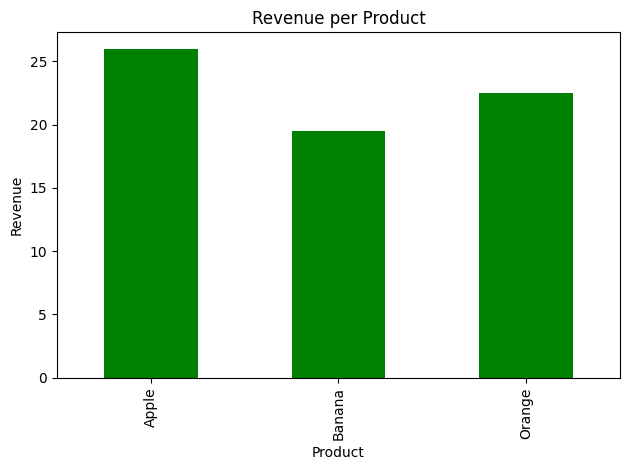

In [6]:
# Step 5: Print and plot
print("📋 Sales Summary:")
print(df)

df.plot(kind='bar', x='product', y='revenue', color='green', legend=False)
plt.title("Revenue per Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

In [7]:
# Step 6: Close connection
conn.close()